# Predictive modeling for mushroom dataset( Using python 3).

In [167]:
#importing libraries from python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#jupyter thing for plots
%matplotlib inline 

In [168]:
#importing train data set
dataset=pd.read_csv('mushroom_train.csv')

dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [169]:
#creating list of all features of our dataset 
features=dataset.columns.tolist()
#creating list of categorical variables of our dataset
categorical_variable=dataset.dtypes[dataset.dtypes=='object'].index.values.tolist()
#creating list of continuous variables of our dataset
continuous_variable=dataset.dtypes[dataset.dtypes=='int64'].index.values.tolist()

# Data visualization for Train Set

1 :


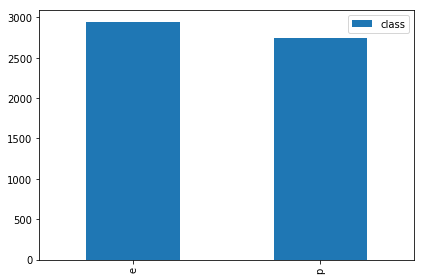

2 :


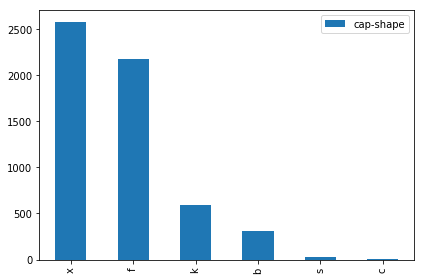

3 :


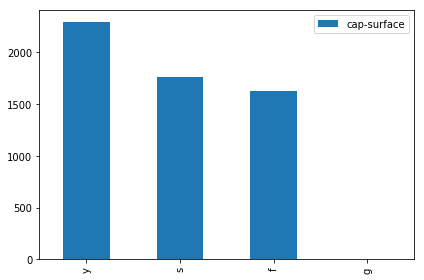

4 :


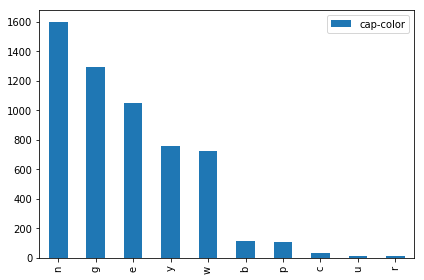

5 :


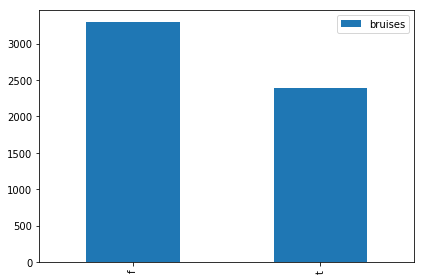

6 :


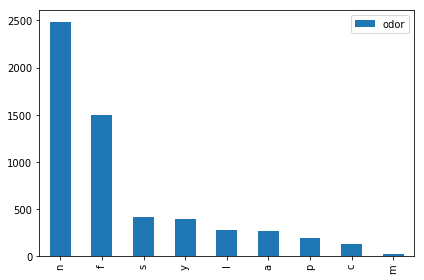

7 :


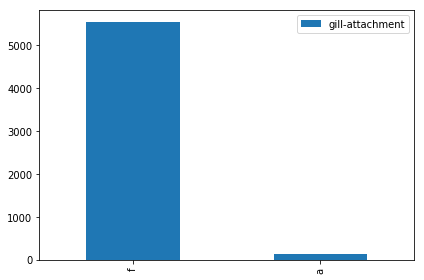

8 :


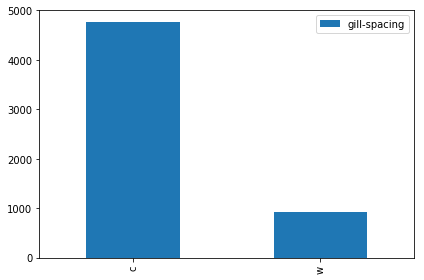

9 :


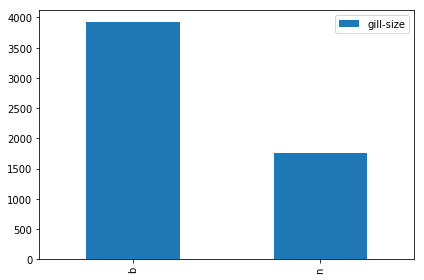

10 :


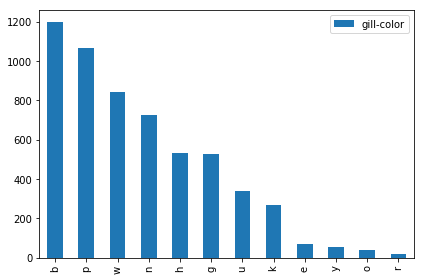

11 :


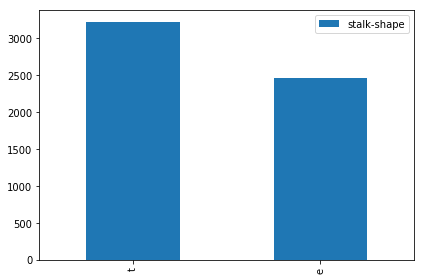

12 :


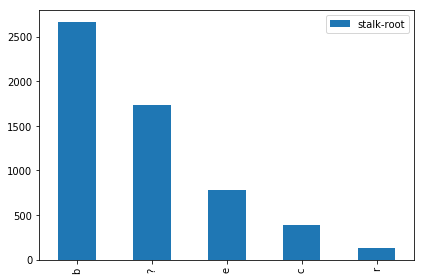

13 :


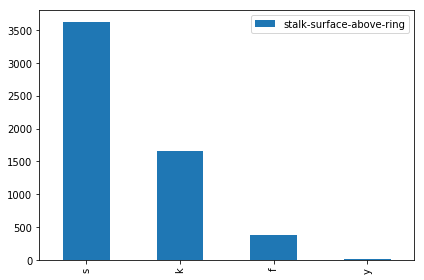

14 :


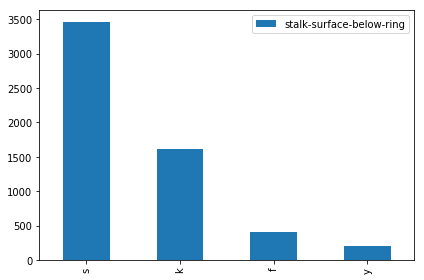

15 :


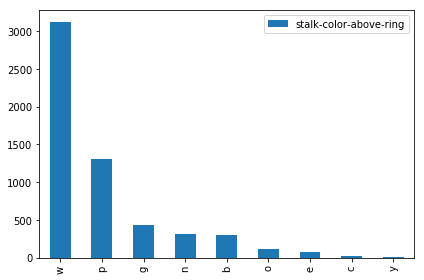

16 :


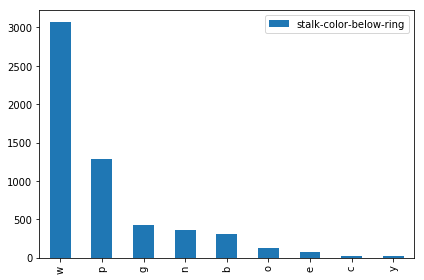

17 :


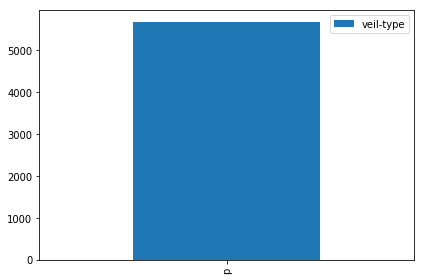

18 :


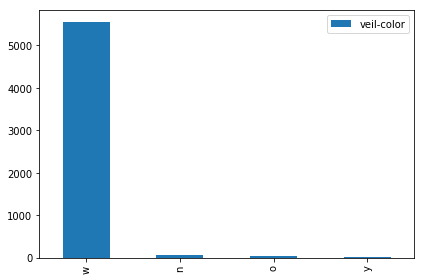

19 :


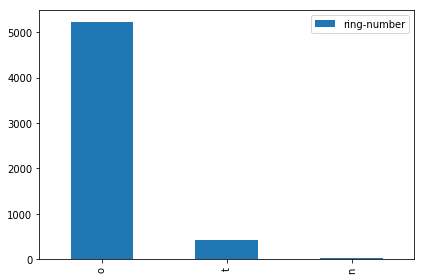

20 :


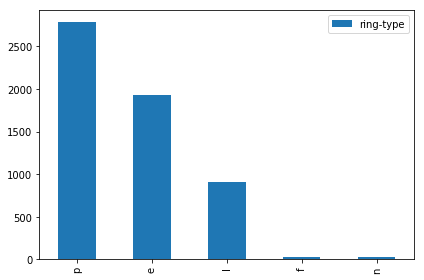

21 :


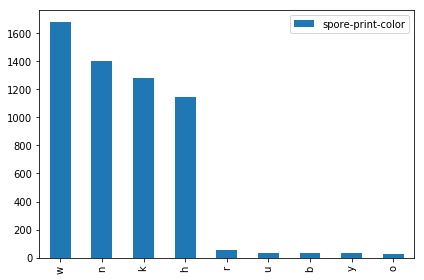

22 :


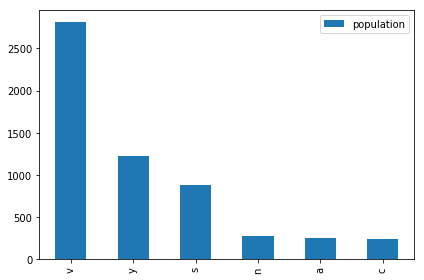

23 :


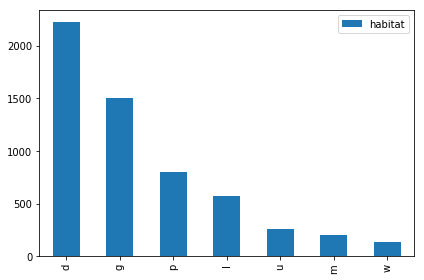

In [170]:
#Ploting histogram for every classes of categorical features of Train dataset 

for i in range(len(categorical_variable)):
    print(i+1,':')
    dataset.iloc[:,features.index(categorical_variable[i])].value_counts().plot(kind='bar')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    

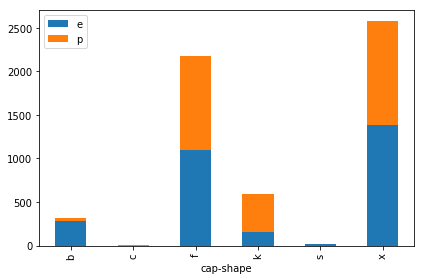

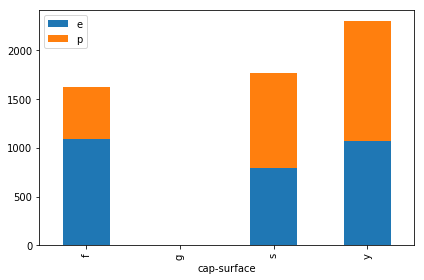

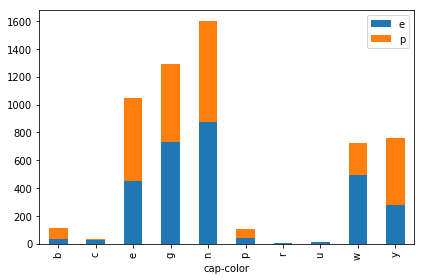

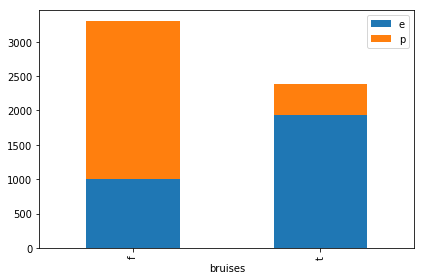

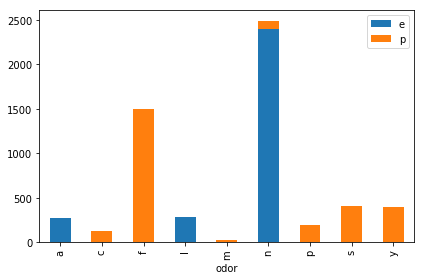

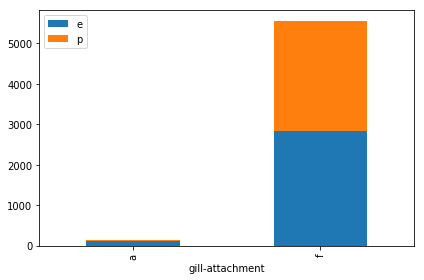

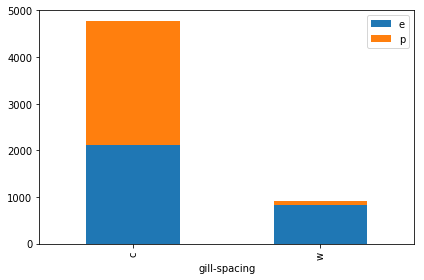

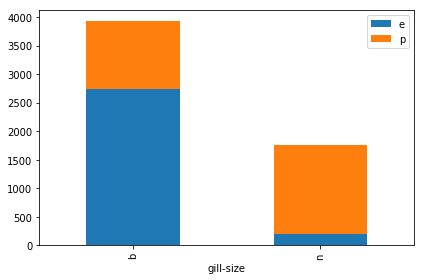

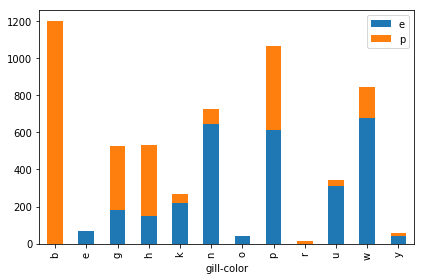

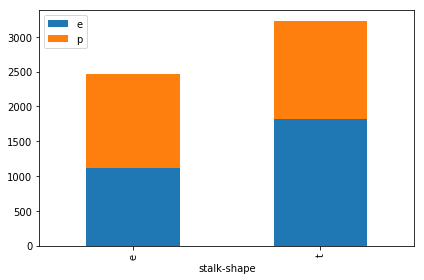

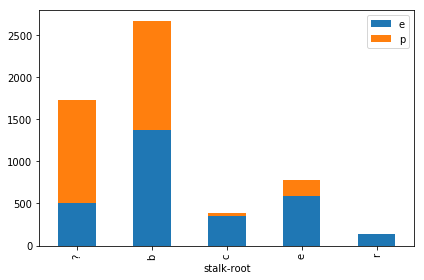

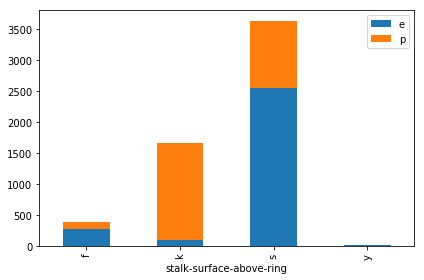

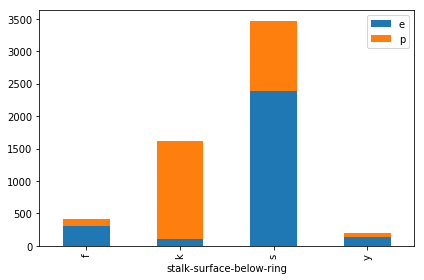

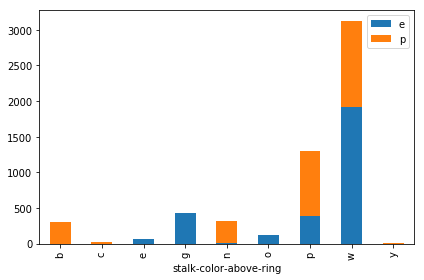

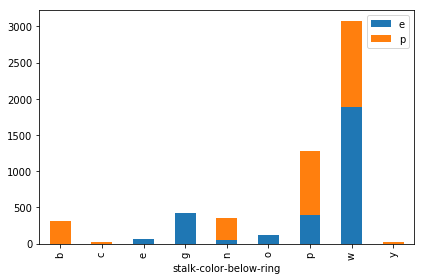

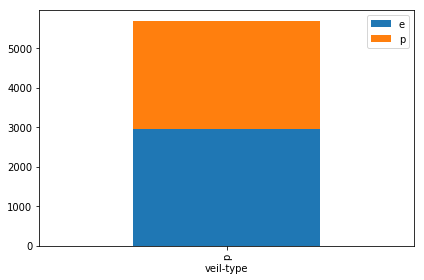

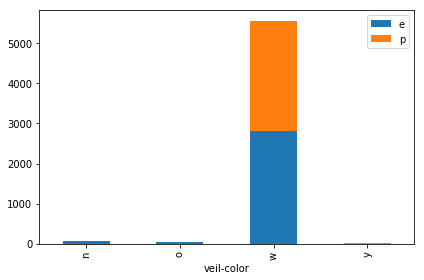

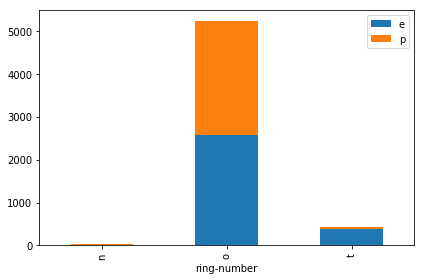

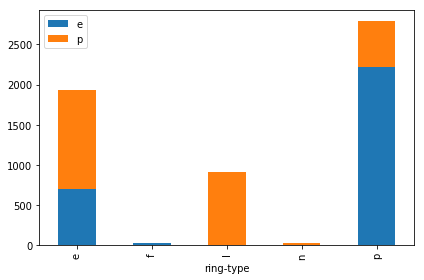

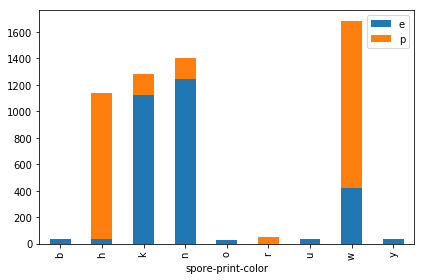

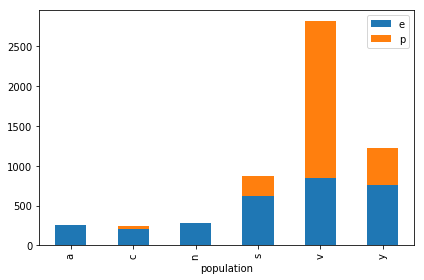

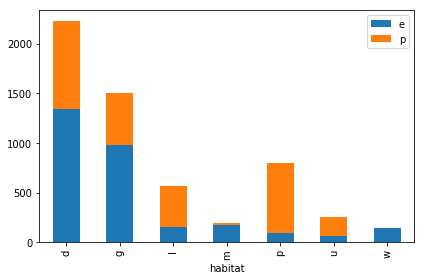

In [171]:
#ploting cross table stacked plot of Target classes with every Classes of other categorical features
for i in range(1,len(categorical_variable)):
    crosstable=pd.crosstab(dataset.iloc[:,features.index(categorical_variable[i])],dataset.iloc[:,0])
    crosstable.plot(kind='bar',stacked=True)
    plt.legend()
    plt.tight_layout()
    plt.show()

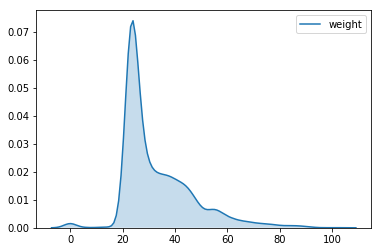

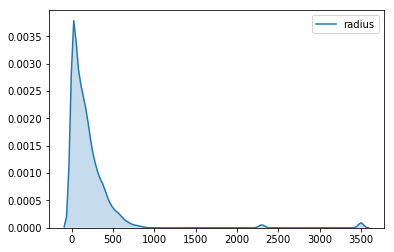

In [172]:
#ploting kernel density plots continuous features
sns.kdeplot(dataset.weight,shade=True)
plt.show()

sns.kdeplot(dataset.radius,shade=True)
plt.show()

In [173]:
#separating poisonous and edible continuous features
#creating lists of poisonous and edible radii
poison_r=[] 
edible_r=[]
for i in range(dataset.shape[0]):
    if (dataset.iloc[i,0]=='p'):
        poison_r.append(dataset.radius[i])
    else:edible_r.append(dataset.radius[i])

#creating lists of poisonous and edible weights
poison_w=[]
edible_w=[]
for i in range(dataset.shape[0]):
    if (dataset.iloc[i,0]=='p'):
        poison_w.append(dataset.weight[i])
    else:edible_w.append(dataset.weight[i])
        
# poison_r variable contains all radii those are poisonous
#edible_r variable contains all radii those are edible
#ans same for weights

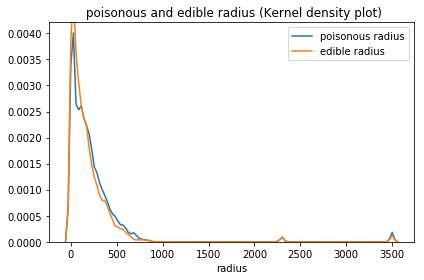

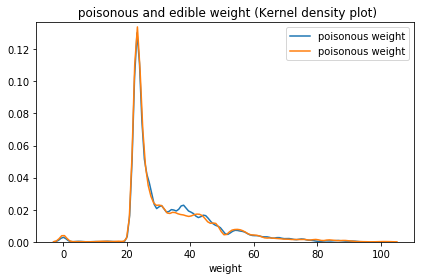

In [174]:
#ploting kernel desity plot for poisonous and edible radii on same axes
sns.kdeplot(poison_r,label='poisonous radius',bw=20)
sns.kdeplot(edible_r,label='edible radius',bw=20)
plt.xlabel('radius')
plt.title(' poisonous and edible radius (Kernel density plot)')
plt.legend()
plt.tight_layout()
plt.show()

#ploting kernel desity plot for poisonous and edible weights on same axes
sns.kdeplot(poison_w,label='poisonous weight',bw=1)
sns.kdeplot(edible_w,label='poisonous weight',bw=1)
plt.xlabel('weight')
plt.title(' poisonous and edible weight (Kernel density plot)')
plt.legend()
plt.tight_layout()
plt.show()

Data engineering and analysing for both Train dataset and Test dataset

In [175]:
#deletting some columns from train dataset, those don't have significant co-relation with target classes
dataset=dataset.drop(['veil-type','veil-color','gill-attachment','radius','weight'],axis=1)
dataset.shape

(5686, 20)

In [176]:
#creating dataframe of independent variables 
X_Train_DataFrame=dataset.iloc[:,1:]

#creating dataframe of dependent variables
y_Train_DataFrame=dataset.iloc[:,0]

#creating numpy array of dependent variables
y=y_Train_DataFrame.values

#creating dummy variables of cetegorical dependent variables
X=pd.get_dummies(X_Train_DataFrame)

#creating list of names of all classes of all categorical variables
#names in the list are in the same order in which they are located in dataframe of dummy variables 
features_X_train=X.columns.tolist()

print(len(features_X_train))
features_X_train[:5] 

110


['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s']

In [177]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [178]:
#importing test dataset
test_dataset=pd.read_csv('mushroom_test.csv')

#deletting same columns from test dataset, which were removed from train dataset
test_dataset=test_dataset.drop(['veil-type','veil-color','gill-attachment','radius','weight'],axis=1)

#for simplicity creating new variable named X_test_Dataframe
X_Test_DataFrame=test_dataset

test_dataset.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,x,f,g,t,n,c,b,u,t,b,s,s,p,g,o,p,k,y,d
1,x,y,g,f,f,c,b,g,e,b,k,k,b,b,o,l,h,v,d
2,b,s,w,t,a,c,b,w,e,c,s,s,w,w,o,p,k,s,m
3,f,y,y,f,f,c,b,p,e,b,k,k,n,b,o,l,h,y,d
4,b,y,y,t,a,c,b,w,e,c,s,s,w,w,o,p,k,n,m


In [179]:
#creating dummy variables of cetegorical variables of test dataset
test_X=pd.get_dummies(test_dataset)

#creating list of names of all classes of all categorical variables of test dataset
#names in the list are in the order in which they are located in dataframe of dummy variables of test dataset 
features_X_test = test_X.columns.tolist()

#creating numpy array of dummy variable dataframe of test dataset
test_X=test_X.values

print(len(features_X_test))
features_X_test[:5]


107


['cap-shape_b', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s', 'cap-shape_x']

In [180]:
#creating list of those classes of categorical variables of train dataset, those are not present in test dataset
#'classes_to_be_removed' is list of  these classes
classes_to_be_removed=[]
for i in features_X_train:
    if i in features_X_test:
        pass
    else:classes_to_be_removed.append(i)
        
classes_to_be_removed    

['cap-shape_c', 'cap-surface_g', 'stalk-color-above-ring_y']

In [181]:
#removing these classes from train dataset
X=X.drop(classes_to_be_removed,axis=1)

#creating again list of names of all classes of all categorical variables after removing from train dataset
features_X_train=X.columns.tolist()

len(features_X_train)

107

In [182]:
#creating numpy array of dummy variable dataframe
X=X.values
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Data preprocessing for Train Data

In [183]:
#encoding target variables of train dataset
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=labelencoder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [184]:
#spliting train dataset into test(25%) data and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.250)

Applying Model

In [185]:
#appling support vector model(linear)

#importing support vector calssifier class(SVC) from scikit learn library 
from sklearn.svm import SVC

#creating object of SVC class 
classifier = SVC(kernel='linear')

#fiting our model on train set
classifier.fit(X_train, y_train)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [186]:
#predicting test set with the help of our model
y_pred = classifier.predict(X_test)

y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

Model Performance

In [187]:
#creating confusion for accuracy of prediction for test set
#indices[0,0] and [1,1] of confusion matrix are correct prediction and vice versa
#cm is confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

cm

array([[732,   0],
       [  0, 690]], dtype=int64)

In [188]:
#printing accuaracy for test set
accuracy_test_set = 100*(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print('accuracy of test set is ',accuracy_test_set,'%')

accuracy of test set is  100.0 %


In [189]:
#applying K fold cross validation on our model, here K is 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

#mean of all accuracies of 10 folds
print(accuracies.mean()*100,'%')


100.0 %


# Data Processing For Imported Test Data set 

In [190]:
#comparing order of features in train set and imported test set(for which prediction is to be made)
#'unmatched' is number of unmatched features in train and test set
unmatched=0
for i in range(len(features_X_train)):
    if (features_X_train[i]==features_X_test[i]):
        pass
    else:
        unmatched +=1
unmatched        

0

Prediction for problem Test Set

In [191]:
#appying our model on given test dataset
predicted_class = classifier.predict(test_X)
predicted_class

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [192]:
#changing predicted class into pandas datafrome from numpy array whith the name of column is 'class'
predicted_class=pd.DataFrame({'class':predicted_class})
predicted_class.head()

,class
0,0
1,1
2,0
3,1
4,0


In [193]:
#decoding predicted class

#replacing 1 for 'p' (poisonous)
predicted_class.loc[predicted_class['class']==1]='p'
#replacing 1 for 'p' (poisonous)
predicted_class.loc[predicted_class['class']==0]='e'

y_Test_DataFrame=predicted_class #for simplicity 
predicted_class.head()

,class
0,e
1,p
2,e
3,p
4,e


In [194]:
#creating CSV file of predicted class from DataFrame
#here code is in multiline comment because 'predicted_class.csv' is already created in the system
#run this code only when You don't have this pericular csv file named 'predicted_class.csv
'''predicted_class.to_csv("predicted_class.csv",index=False)'''

'predicted_class.to_csv("predicted_class.csv",index=False)'

# Analyzing Prediction 

Visualization of Test data with Predicted class and Train Data

1 : cap-shape for train set


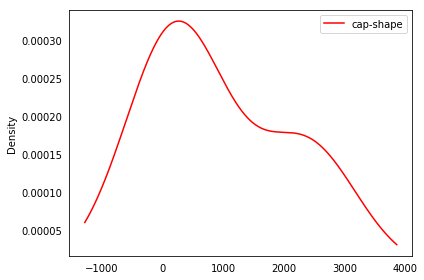

1 : cap-shape for test set


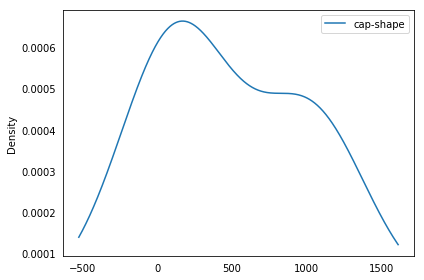

2 : cap-surface for train set


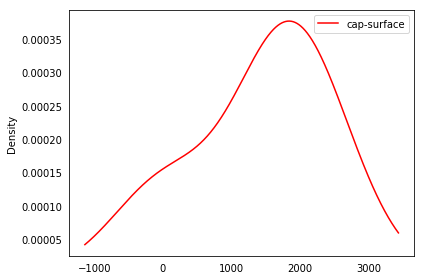

2 : cap-surface for test set


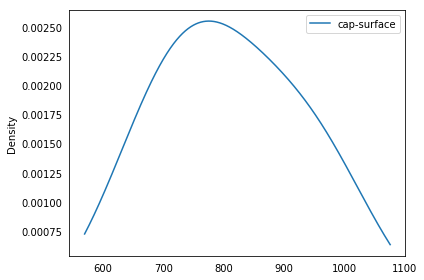

3 : cap-color for train set


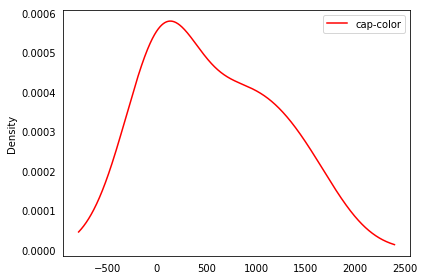

3 : cap-color for test set


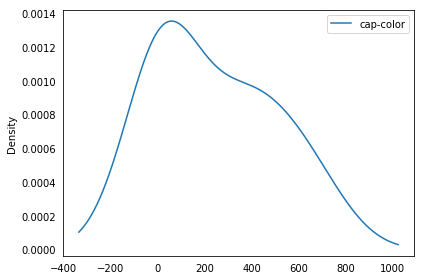

4 : bruises for train set


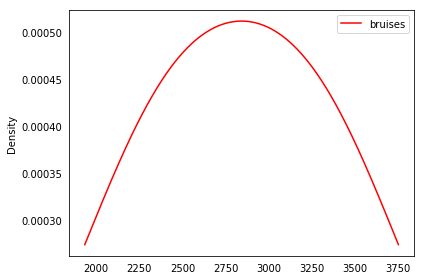

4 : bruises for test set


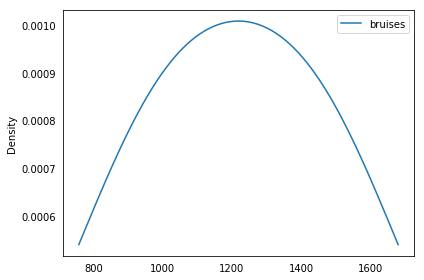

5 : odor for train set


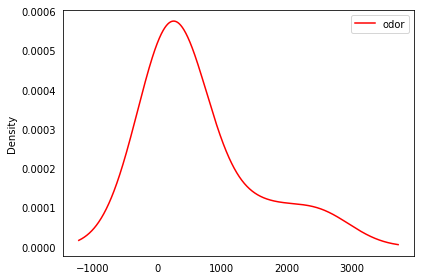

5 : odor for test set


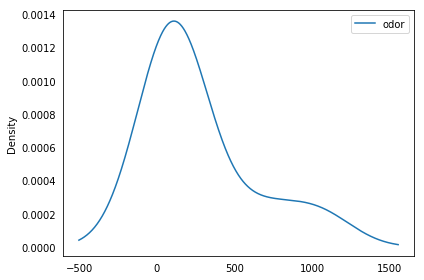

6 : gill-spacing for train set


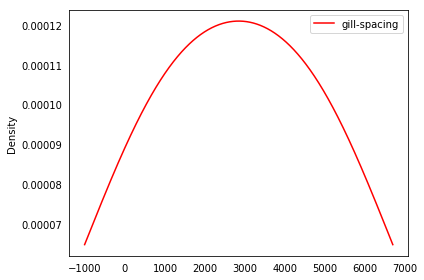

6 : gill-spacing for test set


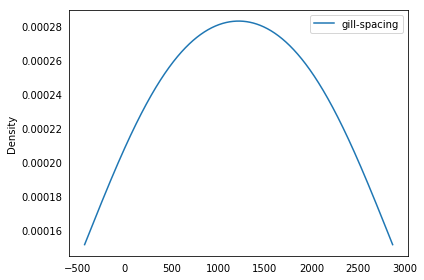

7 : gill-size for train set


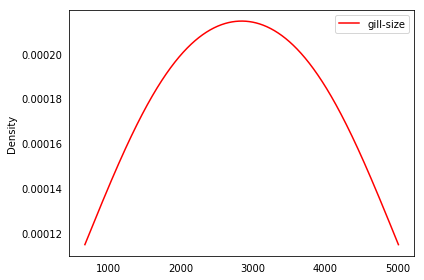

7 : gill-size for test set


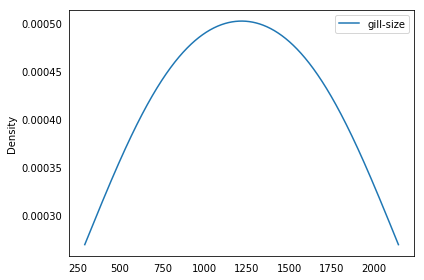

8 : gill-color for train set


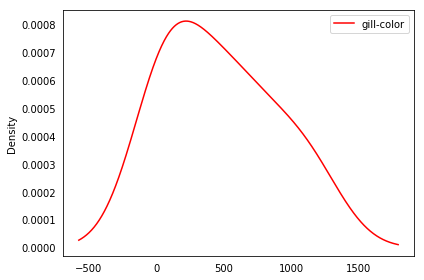

8 : gill-color for test set


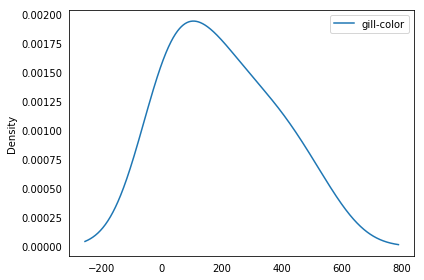

9 : stalk-shape for train set


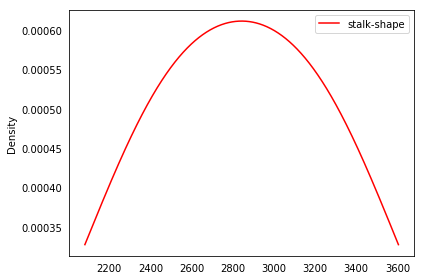

9 : stalk-shape for test set


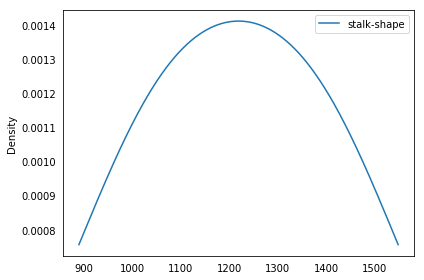

10 : stalk-root for train set


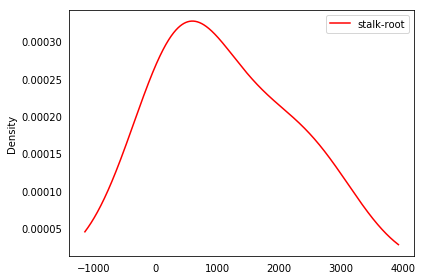

10 : stalk-root for test set


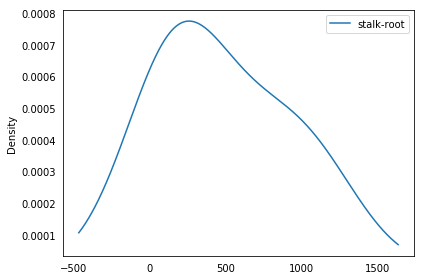

11 : stalk-surface-above-ring for train set


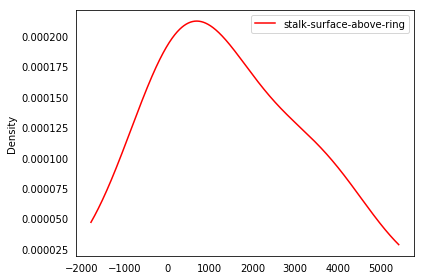

11 : stalk-surface-above-ring for test set


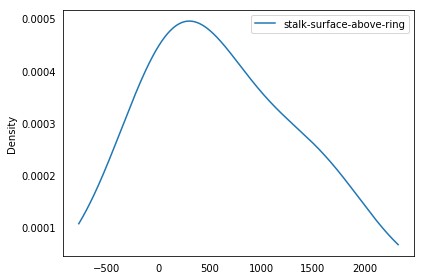

12 : stalk-surface-below-ring for train set


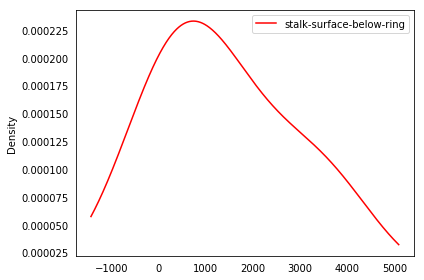

12 : stalk-surface-below-ring for test set


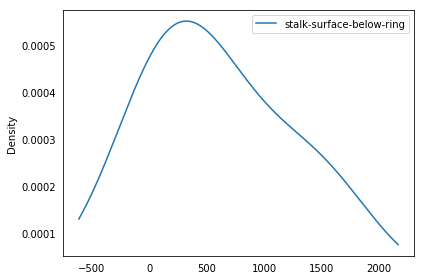

13 : stalk-color-above-ring for train set


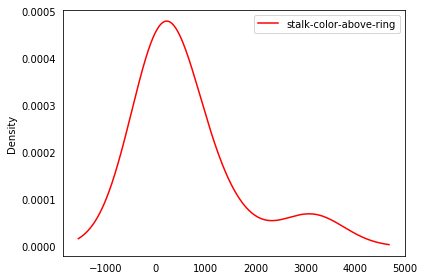

13 : stalk-color-above-ring for test set


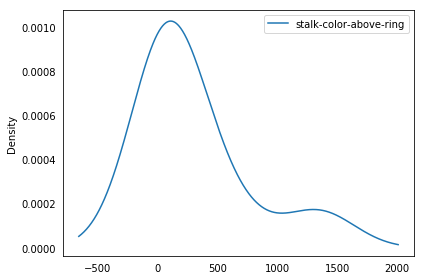

14 : stalk-color-below-ring for train set


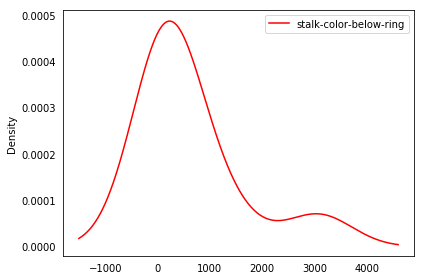

14 : stalk-color-below-ring for test set


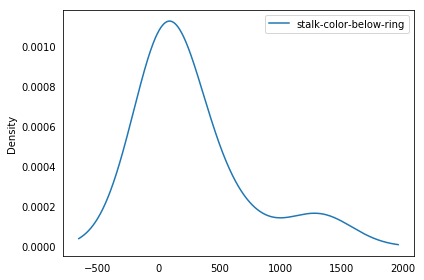

15 : ring-number for train set


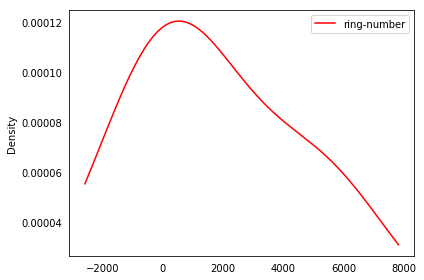

15 : ring-number for test set


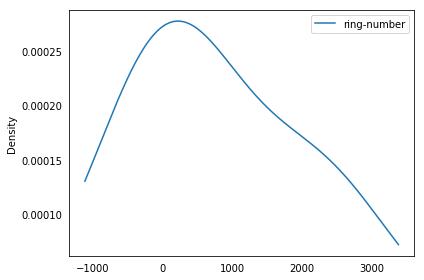

16 : ring-type for train set


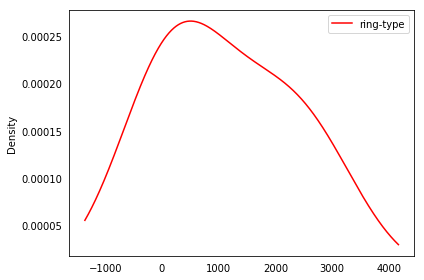

16 : ring-type for test set


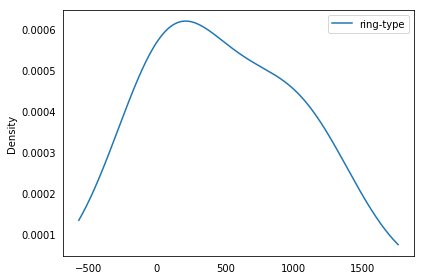

17 : spore-print-color for train set


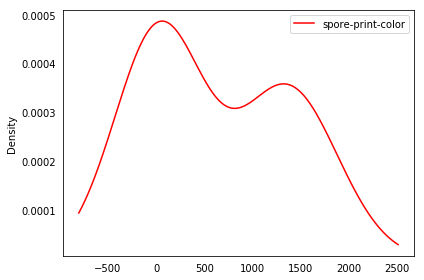

17 : spore-print-color for test set


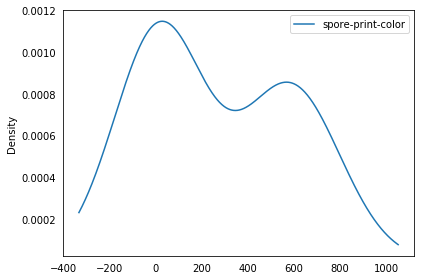

18 : population for train set


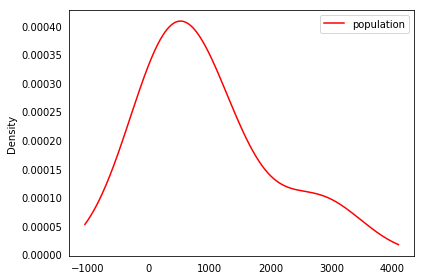

18 : population for test set


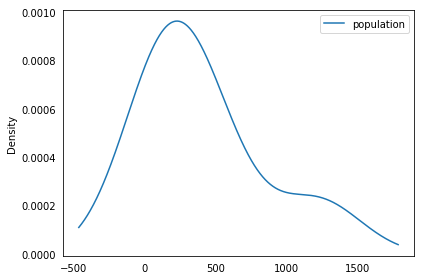

19 : habitat for train set


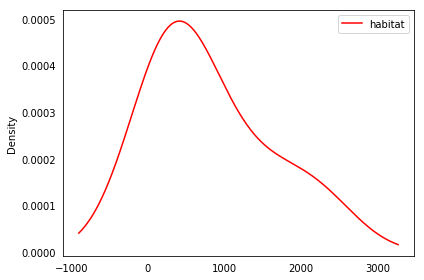

19 : habitat for test set


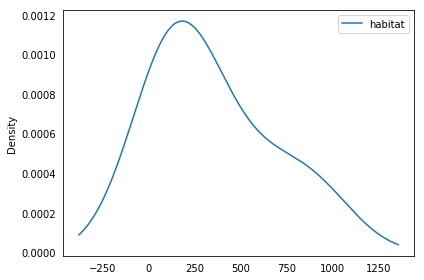

In [195]:
#Ploting kernel densitiy plot  for every classes of features of Train dataset(Red) and Test set(Blue) separately 

for i in range(X_Train_DataFrame.shape[1]):
    #for train set
    print(i+1,':',X_Train_DataFrame.columns[i],'for train set')
    X_Train_DataFrame.iloc[:,i].value_counts().plot(kind='kde',color='red')
    plt.legend()
    plt.tick_params(bottom='off',left='off')
    plt.tight_layout()
    plt.show()
    
    #for test set
    print(i+1,':',X_Test_DataFrame.columns[i],'for test set')
    X_Test_DataFrame.iloc[:,i].value_counts().plot(kind='kde')
    plt.legend()
    plt.tick_params(bottom='off',left='off')
    plt.tight_layout()
    plt.show()
    
    
    

1 : cap-shape for train set


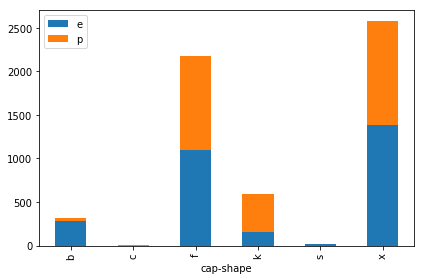

1 : cap-shape for test set


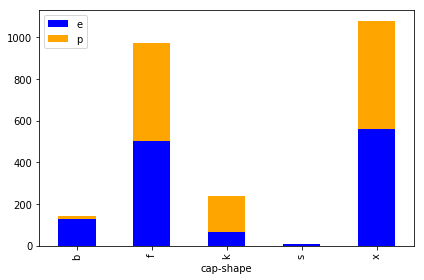

2 : cap-surface for train set


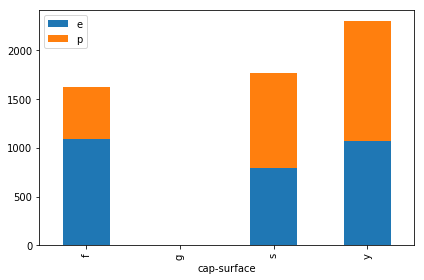

2 : cap-surface for test set


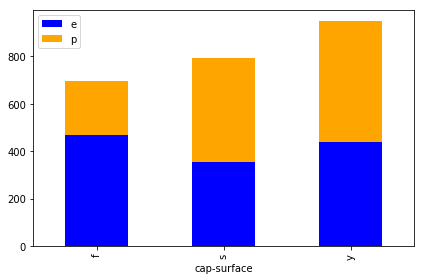

3 : cap-color for train set


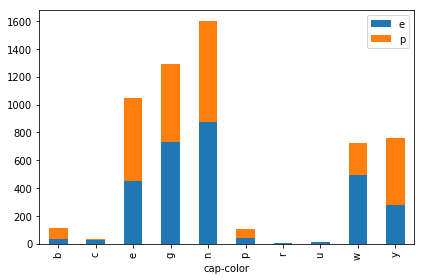

3 : cap-color for test set


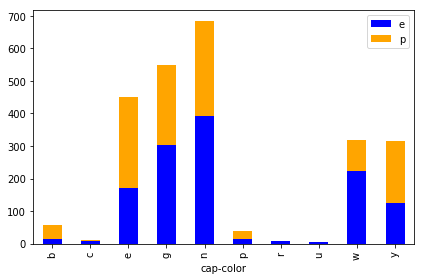

4 : bruises for train set


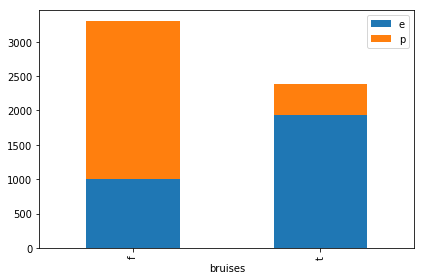

4 : bruises for test set


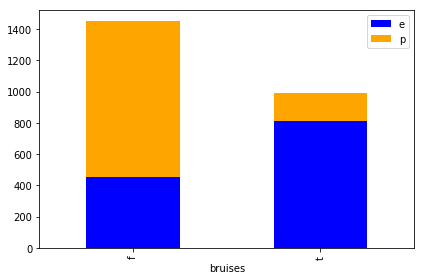

5 : odor for train set


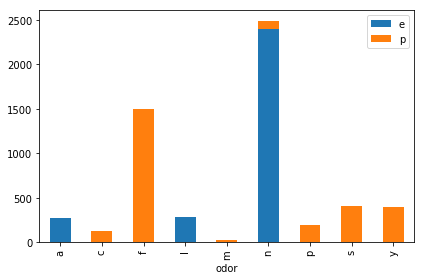

5 : odor for test set


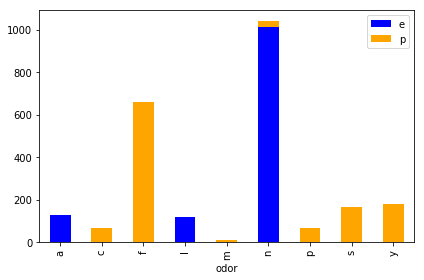

6 : gill-spacing for train set


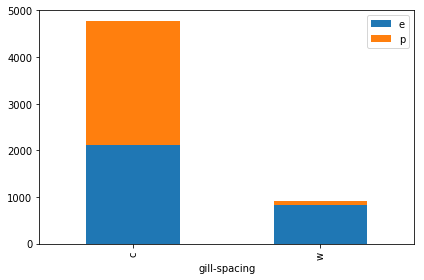

6 : gill-spacing for test set


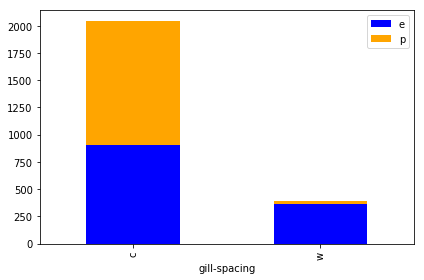

7 : gill-size for train set


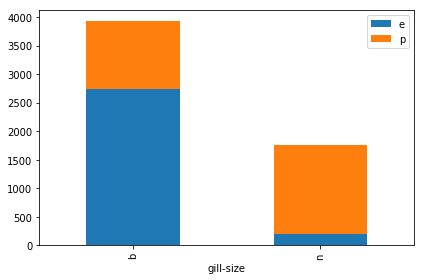

7 : gill-size for test set


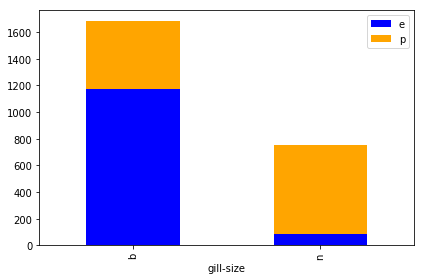

8 : gill-color for train set


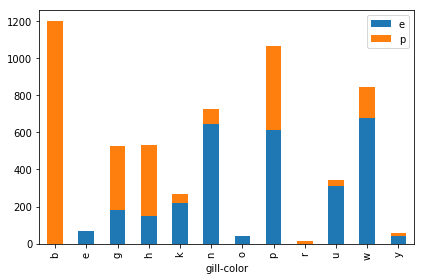

8 : gill-color for test set


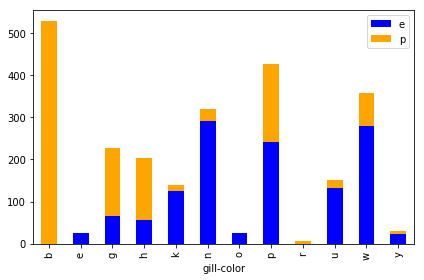

9 : stalk-shape for train set


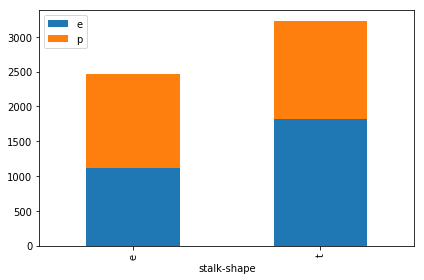

9 : stalk-shape for test set


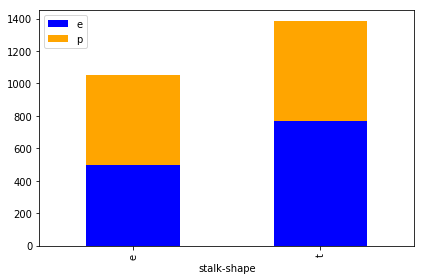

10 : stalk-root for train set


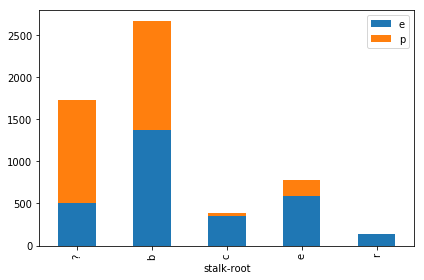

10 : stalk-root for test set


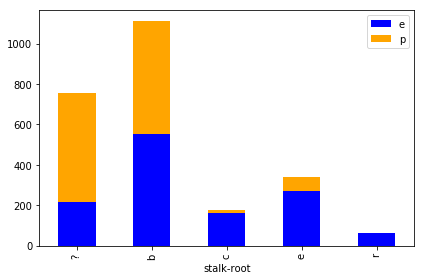

11 : stalk-surface-above-ring for train set


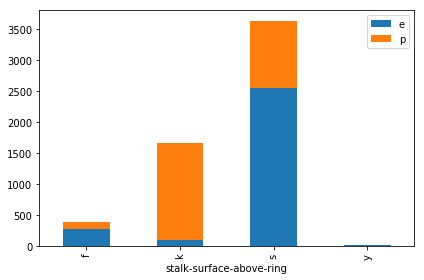

11 : stalk-surface-above-ring for test set


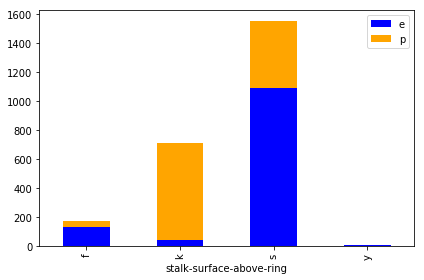

12 : stalk-surface-below-ring for train set


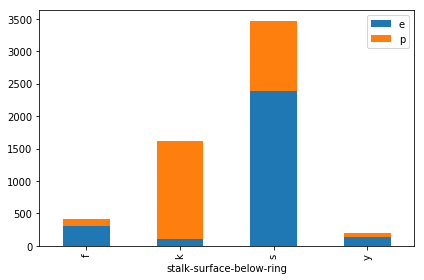

12 : stalk-surface-below-ring for test set


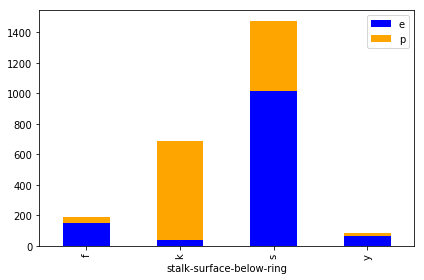

13 : stalk-color-above-ring for train set


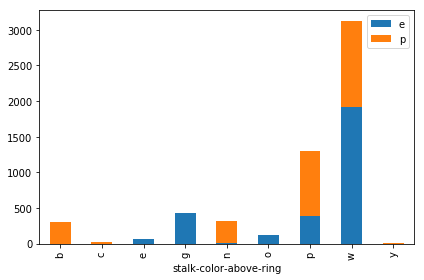

13 : stalk-color-above-ring for test set


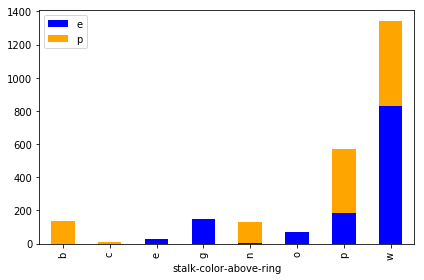

14 : stalk-color-below-ring for train set


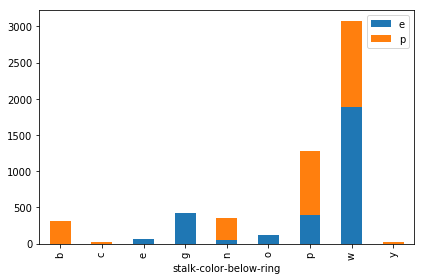

14 : stalk-color-below-ring for test set


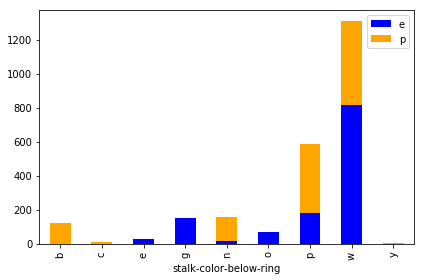

15 : ring-number for train set


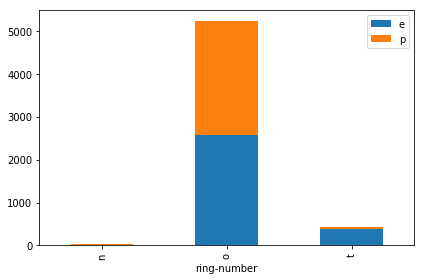

15 : ring-number for test set


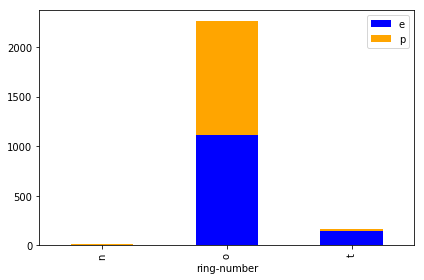

16 : ring-type for train set


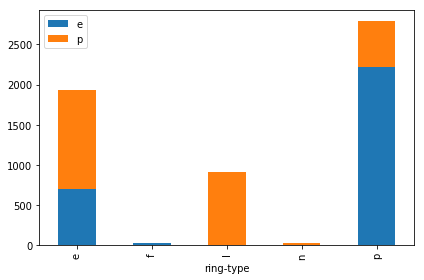

16 : ring-type for test set


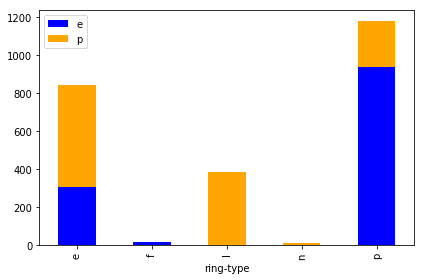

17 : spore-print-color for train set


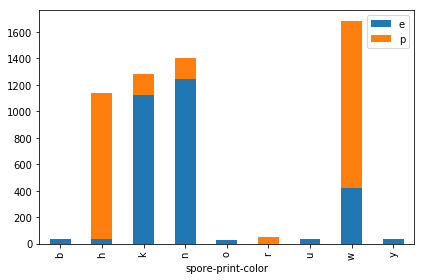

17 : spore-print-color for test set


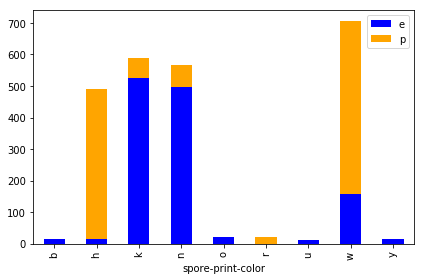

18 : population for train set


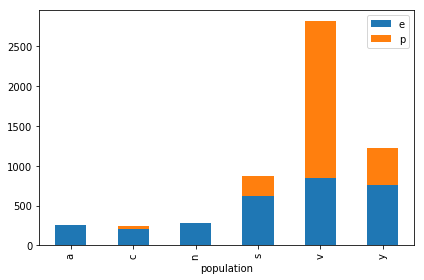

18 : population for test set


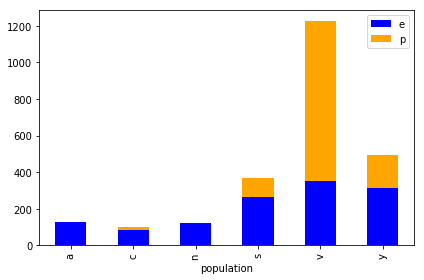

19 : habitat for train set


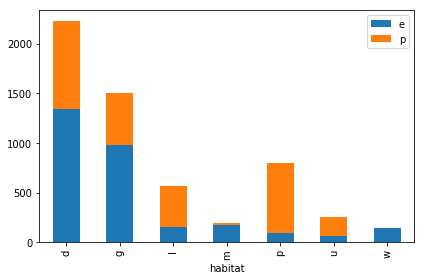

19 : habitat for test set


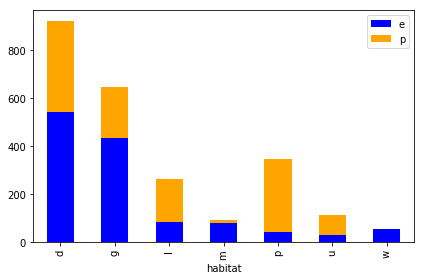

In [196]:
'''ploting cross table stacked plot  of our Train Target classes and 
   Predicted Test Target classes  with every Classes of other features 
   of respectively train and test set separately'''   

for i in range(X_Train_DataFrame.shape[1]):
    #for train set
    print(i+1,':',X_Train_DataFrame.columns[i],'for train set')
    crosstable=pd.crosstab(X_Train_DataFrame.iloc[:,i],y_Train_DataFrame)
    crosstable.plot(kind='bar',stacked=True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    #for test set
    print(i+1,':',X_Test_DataFrame.columns[i],'for test set')
    crosstable=pd.crosstab(X_Test_DataFrame.iloc[:,i],y_Test_DataFrame.iloc[:,0])
    crosstable.plot(kind='bar',stacked=True,color=['blue','orange'])
    plt.legend()
    plt.tight_layout()
    plt.show()

# End :)